# 数据读取

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,cross_validate,KFold,cross_val_predict
from sklearn.cross_decomposition import PLSRegression
# 实用函数
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, roc_auc_score,make_scorer

import time
import spectrapepper as spep

from spectra_processing import *

In [2]:
!python --version

Python 3.9.15


In [3]:
import sklearn
sklearn.__version__

'1.1.1'

In [4]:
FTIR_train=pd.read_csv('数据集/FTIR_rabbit_train_ave_mean center.csv',index_col=0)
FTIR_test=pd.read_csv('数据集/FTIR_rabbit_test_ave_mean center.csv',index_col=0)
FTIR_wavenum=np.array(FTIR_train.columns.tolist()[7:],dtype='float')
FTIR_datatrain=FTIR_train.iloc[:,7:]

Raman_train=pd.read_csv('数据集/Raman_rabbit_train_ave_mean center.csv',index_col=0)
Raman_test=pd.read_csv('数据集/Raman_rabbit_test_ave_mean center.csv',index_col=0)
Raman_wavenum=np.array(Raman_train.columns.tolist()[7:],dtype='float')
Raman_datatrain=Raman_train.iloc[:,7:]

Combine_train=pd.concat([FTIR_train,Raman_train.iloc[:,7:]],axis=1)
Combine_test=pd.concat([FTIR_test,Raman_test.iloc[:,7:]],axis=1)
Combine_wavenum=np.array(Combine_train.columns.tolist()[7:],dtype='float')
Combine_datatrain=Combine_train.iloc[:,7:]

In [5]:
data_FTIR_train=FTIR_train.copy()
data_FTIR_test=FTIR_test.copy()


data_FTIR_train['label1'].replace(to_replace='Q',value=1,inplace=True)
data_FTIR_train['label1'].replace(to_replace='S',value=0,inplace=True)
data_FTIR_train['label6'].replace(to_replace='Q',value=1,inplace=True)
data_FTIR_train['label6'].replace(to_replace='QS',value=2,inplace=True)
data_FTIR_train['label6'].replace(to_replace='S',value=0,inplace=True)

data_FTIR_test['label1'].replace(to_replace='Q',value=1,inplace=True)
data_FTIR_test['label1'].replace(to_replace='S',value=0,inplace=True)
data_FTIR_test['label6'].replace(to_replace='Q',value=1,inplace=True)
data_FTIR_test['label6'].replace(to_replace='QS',value=2,inplace=True)
data_FTIR_test['label6'].replace(to_replace='S',value=0,inplace=True)

data_Raman_train=Raman_train.copy()
data_Raman_test=Raman_test.copy()


data_Raman_train['label_1'].replace(to_replace='Q',value=1,inplace=True)
data_Raman_train['label_1'].replace(to_replace='S',value=0,inplace=True)
data_Raman_train['label_6'].replace(to_replace='Q',value=1,inplace=True)
data_Raman_train['label_6'].replace(to_replace='QS',value=2,inplace=True)
data_Raman_train['label_6'].replace(to_replace='S',value=0,inplace=True)

data_Raman_test['label_1'].replace(to_replace='Q',value=1,inplace=True)
data_Raman_test['label_1'].replace(to_replace='S',value=0,inplace=True)
data_Raman_test['label_6'].replace(to_replace='Q',value=1,inplace=True)
data_Raman_test['label_6'].replace(to_replace='QS',value=2,inplace=True)
data_Raman_test['label_6'].replace(to_replace='S',value=0,inplace=True)


data_Combine_train=Combine_train.copy()
data_Combine_test=Combine_test.copy()


data_Combine_train['label1'].replace(to_replace='Q',value=1,inplace=True)
data_Combine_train['label1'].replace(to_replace='S',value=0,inplace=True)
data_Combine_train['label6'].replace(to_replace='Q',value=1,inplace=True)
data_Combine_train['label6'].replace(to_replace='QS',value=2,inplace=True)
data_Combine_train['label6'].replace(to_replace='S',value=0,inplace=True)

data_Combine_test['label1'].replace(to_replace='Q',value=1,inplace=True)
data_Combine_test['label1'].replace(to_replace='S',value=0,inplace=True)
data_Combine_test['label6'].replace(to_replace='Q',value=1,inplace=True)
data_Combine_test['label6'].replace(to_replace='QS',value=2,inplace=True)
data_Combine_test['label6'].replace(to_replace='S',value=0,inplace=True)

In [6]:
x_FTIR_train=data_FTIR_train.iloc[:,7:].values
y_FTIR_train_two=data_FTIR_train['label1'].values
y_FTIR_train_three=data_FTIR_train['label6'].values
x_FTIR_test=data_FTIR_test.iloc[:,7:].values
y_FTIR_test_two=data_FTIR_test['label1'].values
y_FTIR_test_three=data_FTIR_test['label6'].values



x_Raman_train=data_Raman_train.iloc[:,7:].values
y_Raman_train_two=data_Raman_train['label_1'].values
y_Raman_train_three=data_Raman_train['label_6'].values
x_Raman_test=data_Raman_test.iloc[:,7:].values
y_Raman_test_two=data_Raman_test['label_1'].values
y_Raman_test_three=data_Raman_test['label_6'].values


x_Combine_train=data_Combine_train.iloc[:,7:].values
y_Combine_train_two=data_Combine_train['label1'].values
y_Combine_train_three=data_Combine_train['label6'].values
x_Combine_test=data_Combine_test.iloc[:,7:].values
y_Combine_test_two=data_Combine_test['label1'].values
y_Combine_test_three=data_Combine_test['label6'].values

label_1=Combine_test['label1']
label_6=Combine_test['label6']
label_2=Combine_test['label2']

label_two= list(set(label_1))
label_two.sort()
label_three=list(set(label_6))
label_three.sort()
label_post=list(set(label_2))
label_post.sort()

In [7]:
y_Raman_test_two==y_FTIR_test_two

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

# 特征 投票模型融合

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin

In [9]:
class PLS_DA(BaseEstimator, TransformerMixin,ClassifierMixin):
    
    def __init__(self, n_components=10,scale=True,max_iter=500,tol=1e-06,thred=0.5):
        self.n_components =n_components
        self.scale=scale
        self.max_iter = max_iter
        self.tol = tol
        self.thred = thred
        
    def fit(self, X, y):
        y_1=pd.get_dummies(y)
        clf = PLSRegression(n_components = self.n_components, 
                                 scale = self.scale, 
                                 max_iter = self.max_iter, 
                                 tol = self.tol)
        clf.fit(X, y_1)
        self.coef_ = clf.coef_
        self.clf=clf
        self.x_loadings_ = clf.x_loadings_
        self.y_loadings_ = clf.y_loadings_
        self.x_scores_ = clf.x_scores_
        self.y_scores_ = clf.y_scores_
        self.classes_=np.unique(y)
        return self
    
    def predict(self, X):
        res = (self.clf.predict(X)[:, 1]>=self.thred) * 1
        return res
    
    def predict_proba(self,X):
        pro=self.clf.predict(X)
        return pro
    
    def score(self,X,y):
        return accuracy_score(y, (self.clf.predict(X)[:, 1]>=self.thred) * 1)

In [10]:
#常用工具库
import re
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import time

#算法辅助 & 数据
import sklearn
from sklearn.model_selection import KFold, cross_validate

#算法（单一学习器）
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC

#融合模型
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor

In [11]:
def individual_estimators(estimators,Xtrain,Ytrain,Xtest,Ytest,seed):
    """
    对模型融合中每个评估器做交叉验证，对单一评估器的表现进行评估
    """
    for estimator,seeds in zip(estimators,seed):
        cv = KFold(n_splits=10,shuffle=True,random_state=seeds)
        results = cross_validate(estimator[1],Xtrain,Ytrain
                             ,cv = cv
                             ,scoring = "accuracy"
                             ,n_jobs = 48
                             ,return_train_score = True
                             ,verbose=False)
        test = estimator[1].fit(Xtrain,Ytrain).score(Xtest,Ytest)
        print(estimator[0]
          ,"\n train_score:{}".format(results["train_score"].mean())
          ,"\n cv_mean:{}".format(results["test_score"].mean())
          ,"\n test_score:{}".format(test)
          ,"\n")
        
        
def fusion_estimators(clf,Xtrain,Ytrain,Xtest,Ytest,seed):
    """
    对融合模型做交叉验证，对融合模型的表现进行评估
    """
    cv = KFold(n_splits=10,shuffle=True,random_state=seed)
    results = cross_validate(clf,Xtrain,Ytrain
                             ,cv = cv
                             ,scoring = "accuracy"
                             ,n_jobs =48
                             ,return_train_score = True
                             ,verbose=False)
    test = clf.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    print("train_score:{}".format(results["train_score"].mean())
          ,"\n cv_mean:{}".format(results["test_score"].mean())
          ,"\n test_score:{}".format(test)
         )

# 低加高级别融合

In [12]:
clc_1=PLS_DA(n_components=9,thred=0.5)
clc_2=SVC(cache_size=5000,kernel='poly',gamma=7.3587,degree=2,coef0=23.179,probability=True,random_state=360)
clc_3=RFC(criterion='log_loss'
           ,n_estimators=47
           ,max_depth=23
           ,max_features=24
           ,max_leaf_nodes=58
           ,min_impurity_decrease=0.0079976
           ,random_state=225)
clc_4=GBC(n_estimators = 138
              ,learning_rate =0.16
              #,criterion = params["criterion"]
              #,loss = "log_loss"
              ,max_depth =3
              ,max_features = 11
              ,subsample = 0.95
              ,min_impurity_decrease = 0.1
              ,init = None
              ,random_state=225
              ,verbose=False)
estimators=[('PLS_DA',clc_1),('SVM',clc_2),('RandomForest',clc_3),('GBDT',clc_4)]
seed=[803,360,229,702]
clf=VotingClassifier(estimators,voting="soft") ## 无weight
clf_weight = VotingClassifier(estimators,voting="soft",weights=[0.98621,1.68831,0.8740,0.239109]) 

# TPE优化选择最佳权重

In [13]:
#导入优化算法
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, partial
from hyperopt.early_stop import no_progress_loss

def hyperopt_objective(params):
    clf_weight = VotingClassifier(estimators,voting="soft",weights=[params['weigh1'],params['weigh2'],params['weigh3'],params['weigh4']]) 
    cv = KFold(n_splits=10,shuffle=True,random_state=int(params['random_state']))
    results = cross_validate(clf_weight,x_Combine_train,y_Combine_train_two
                             ,cv = cv
                             ,scoring = "accuracy"
                             ,n_jobs =-1
                             ,return_train_score = True
                             ,verbose=False)
    return -np.mean(results["test_score"])


param_grid_simple = {'weigh1':hp.uniform('weigh1',0,1)
                    ,'weigh2':hp.uniform('weigh2',0,1)
                    ,'weigh3':hp.uniform('weigh3',0,1)
                    ,'weigh4':hp.uniform('weigh4',0,1)
                    ,"random_state":hp.quniform("random_state",1,1000,1)
                 }


def param_hyperopt(max_evals=100,n=50):
    
    #保存迭代过程
    trials = Trials()
    
    #设置提前停止
    early_stop_fn = no_progress_loss(n)
    
    #定义代理模型
    #algo = partial(tpe.suggest, n_startup_jobs=20, n_EI_candidates=50)
    params_best = fmin(hyperopt_objective #目标函数
                       , space = param_grid_simple #参数空间
                       , algo = tpe.suggest #代理模型你要哪个呢？
                       #, algo = algo
                       , max_evals = max_evals #允许的迭代次数
                       , verbose=True
                       , trials = trials
                       , early_stop_fn = early_stop_fn
                      )
    
    #打印最优参数，fmin会自动打印最佳分数
    print("\n","\n","best params: ", params_best,
          "\n")
    return params_best, trials 

## params_best, trials = param_hyperopt(1000,200)

In [14]:
individual_estimators(estimators,x_Combine_train,y_Combine_train_two,x_Combine_test,y_Combine_test_two,seed)

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


PLS_DA 
 train_score:0.9239383209844163 
 cv_mean:0.8124777183600713 
 test_score:0.7857142857142857 

SVM 
 train_score:1.0 
 cv_mean:0.8513368983957219 
 test_score:0.8571428571428571 

RandomForest 
 train_score:1.0 
 cv_mean:0.7950089126559715 
 test_score:0.8333333333333334 

GBDT 
 train_score:1.0 
 cv_mean:0.8003565062388592 
 test_score:0.8095238095238095 



In [15]:
fusion_estimators(clf,x_Combine_train,y_Combine_train_two,x_Combine_test,y_Combine_test_two,902)

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


train_score:1.0 
 cv_mean:0.8479500891265597 
 test_score:0.9166666666666666


In [16]:
fusion_estimators(clf_weight,x_Combine_train,y_Combine_train_two,x_Combine_test,y_Combine_test_two,407)

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


train_score:1.0 
 cv_mean:0.8601604278074866 
 test_score:0.8690476190476191


In [17]:
from sklearn.metrics import  RocCurveDisplay,ConfusionMatrixDisplay

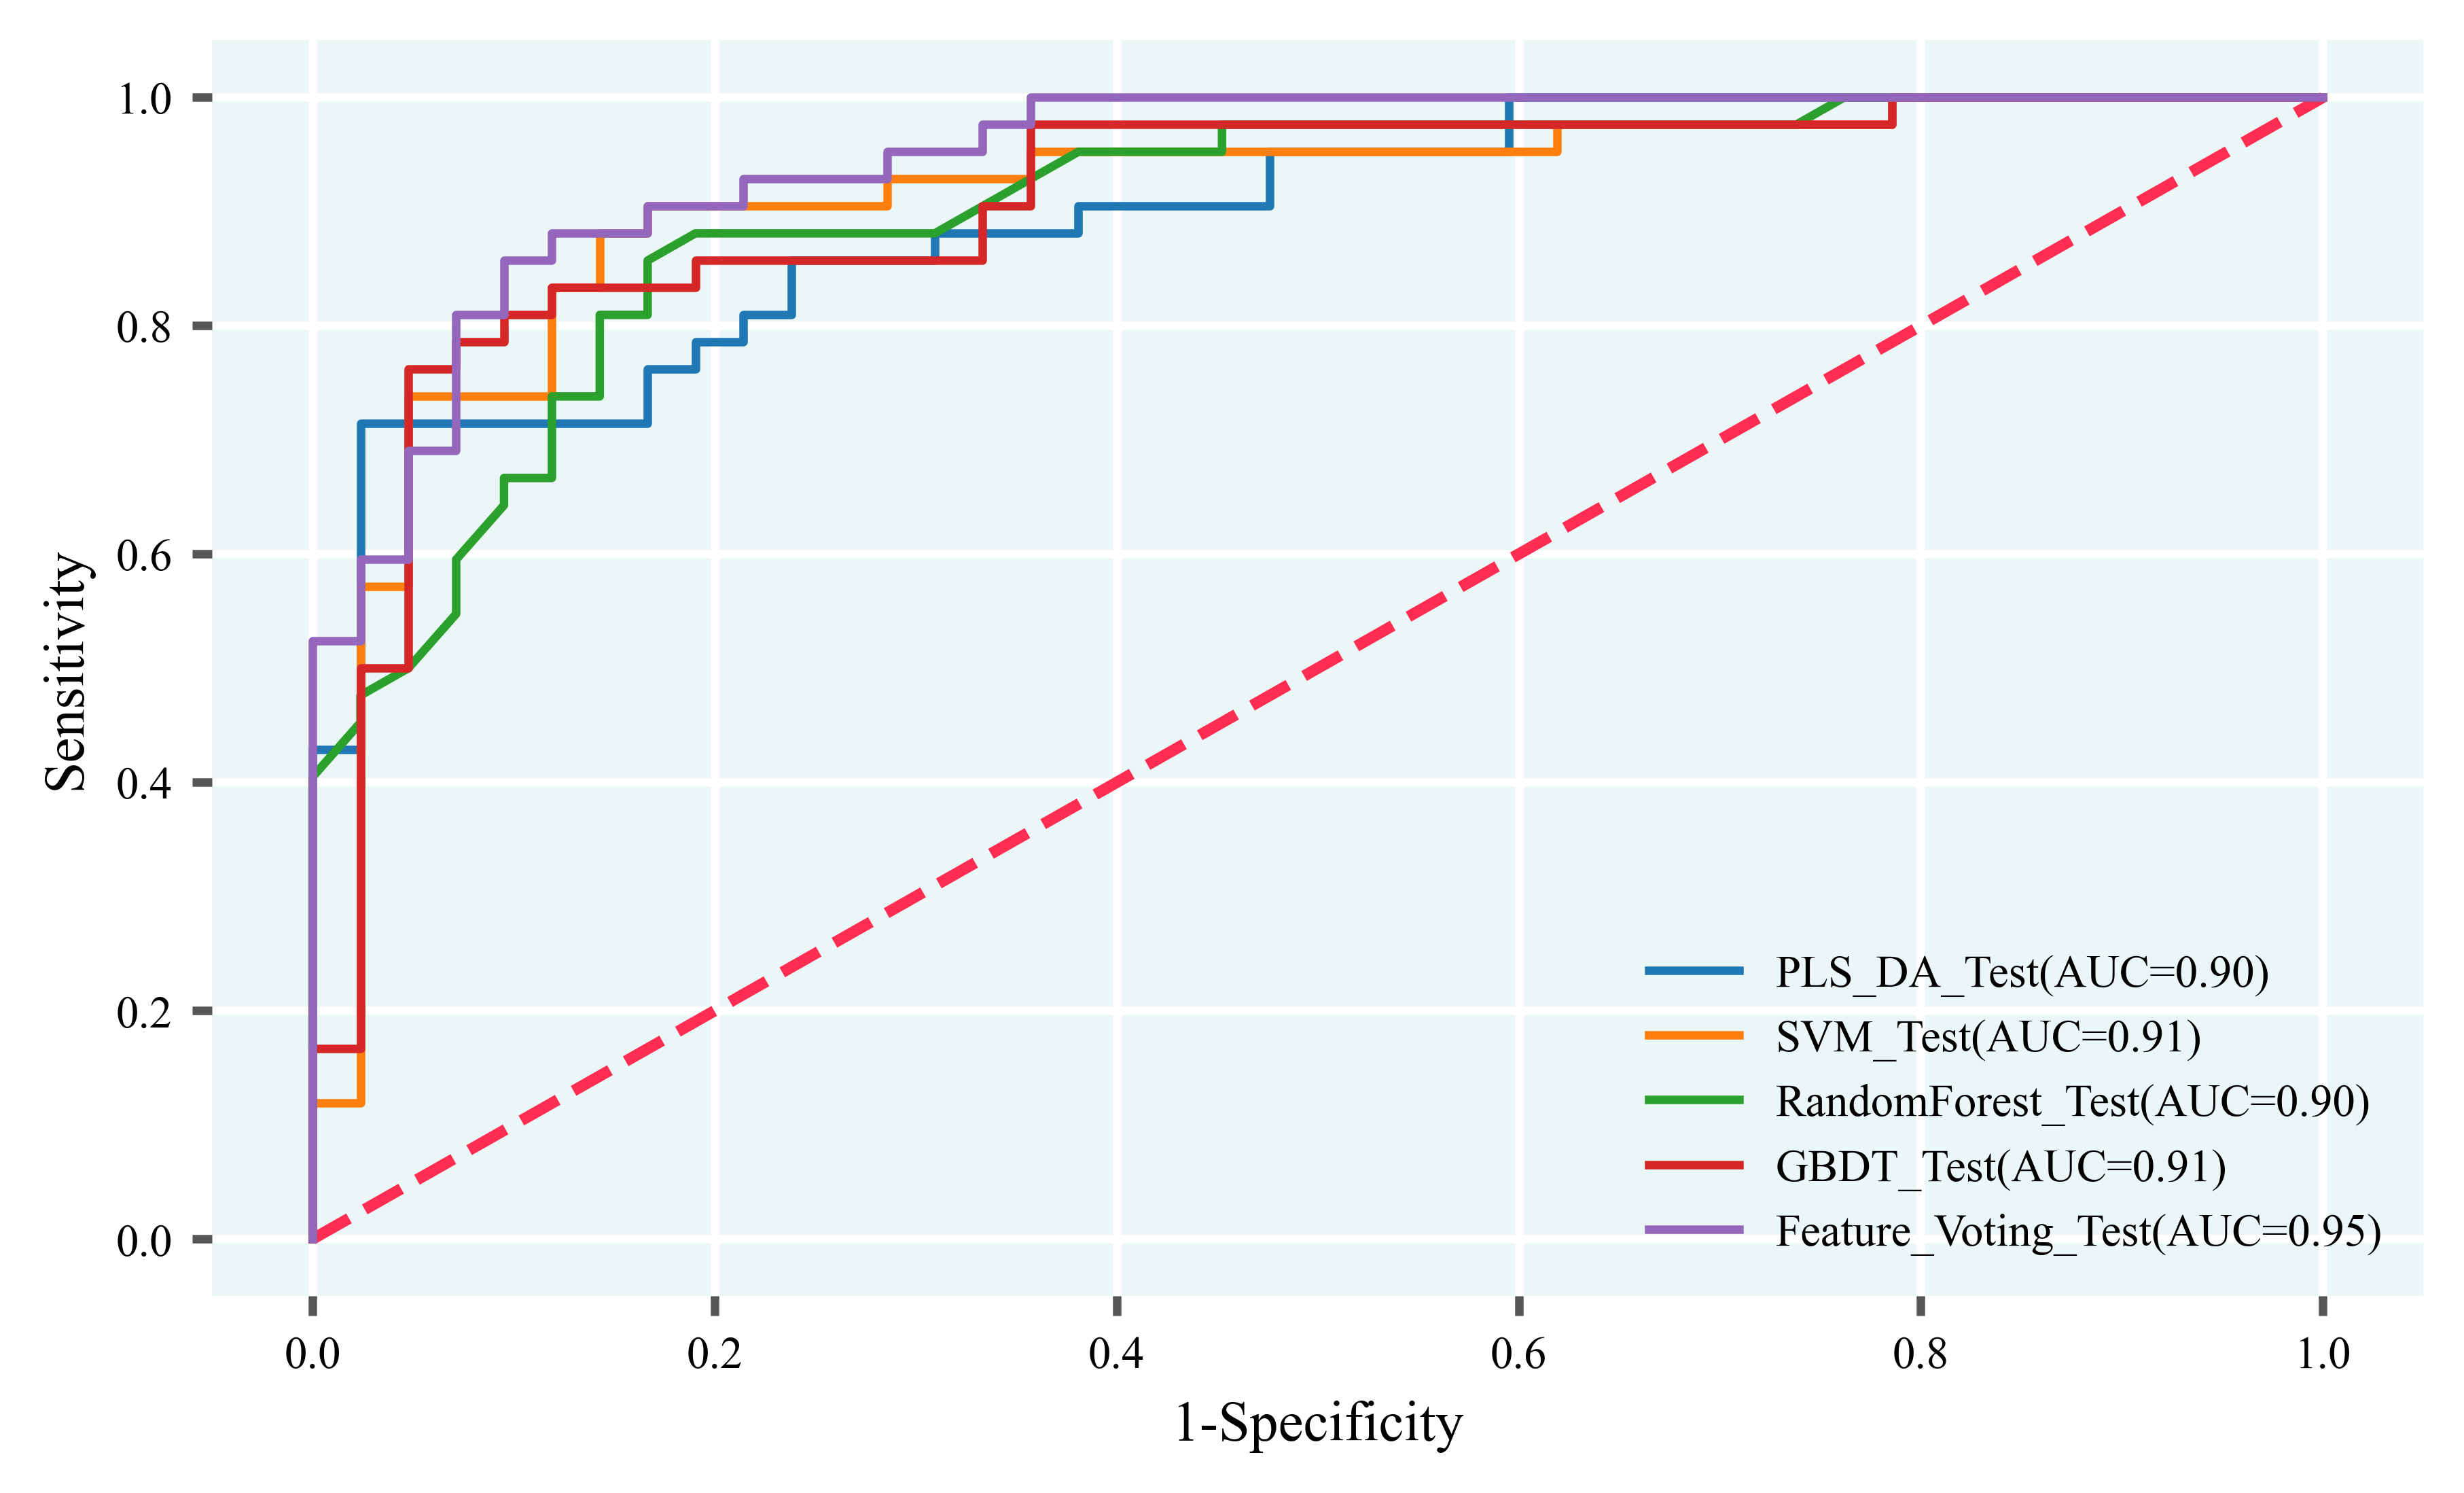

In [18]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
from pathlib import Path
from cycler import cycler
import matplotlib.font_manager as fm
# 全局修改rcParams["axes.prop_cycle"]，对所有子图生效
default_cycler = (cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) )
plt.style.use('ggplot')
plt.rc('axes', prop_cycle=default_cycler,labelcolor='#000000',facecolor='#ebf6f7',linewidth=0)
plt.rc('font',family='Times New Roman',weight='roman',size=8)
font_title=fm.FontProperties(family='Times New Roman',weight='roman',size=12)
font_label=fm.FontProperties(family='Times New Roman',weight='roman',size=10)


#plt.figure(figsize=(8,5),dpi=600)
#plt.subplots_adjust(hspace=0.2, wspace=0.1)

fig, axs = plt.subplots(figsize=(7, 4),dpi=600)
#plt.subplots_adjust(hspace=0.1, wspace=0.4)
aucs=['0.90','0.91','0.90','0.91']
plt.plot([0,1],[0,1],color='#ff2d51',lw=2,ls='--')
for estimator,auc in zip(estimators,aucs):
    RocCurveDisplay.from_estimator(estimator[1],x_Combine_test,y_Combine_test_two,ax=axs,label=estimator[0]+'_Test(AUC=%s)'%(auc))

RocCurveDisplay.from_estimator(clf_weight,x_Combine_test,y_Combine_test_two,ax=axs,label='Feature_Voting_Test(AUC=0.95)')
axs.tick_params(axis='both',labelsize=8,labelcolor='#000000',direction='out',width=1.5,grid_linewidth=1.5)
axs.set_xlabel('1-Specificity',fontproperties=font_label)
axs.set_ylabel('Sensitivity',fontproperties=font_label)
axs.legend(loc='best',frameon=False)

#plt.savefig('图片/ROC_features.eps',dpi=600,format='eps',bbox_inches='tight')
plt.show()

In [19]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
from pathlib import Path
from cycler import cycler
import matplotlib as mpl
import matplotlib.font_manager as fm
# 全局修改rcParams["axes.prop_cycle"]，对所有子图生效
default_cycler = (cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) )
plt.style.use('ggplot')
plt.rc('axes', prop_cycle=default_cycler,labelcolor='#000000',facecolor='#ebf6f7',linewidth=0)
plt.rc('font',family='Times New Roman',weight='roman',size=12)
plt.rc('text',color='#000000')
font_title=fm.FontProperties(family='Times New Roman',weight='roman',size=12)
font_label=fm.FontProperties(family='Times New Roman',weight='roman',size=10)


#plt.figure(figsize=(8,5),dpi=600)
#plt.subplots_adjust(hspace=0.2, wspace=0.1)


estimators_all=[('PLS_DA',clc_1),('SVM',clc_2),('RandomForest',clc_3),('GBDT',clc_4),('Voting',clf_weight)]
fig, axes = plt.subplots(2, 3, figsize=(21, 8), constrained_layout=True,dpi=600)
#plt.subplots_adjust(hspace=0.1, wspace=0.4)
for estimator,axs in zip(estimators_all,axes.flat):
    ConfusionMatrixDisplay.from_estimator(estimator[1],x_Combine_test,y_Combine_test_two,ax=axs,display_labels=['Postmortem','Antemortem'],cmap='Blues',colorbar=False)
    axs.tick_params(axis='both',labelsize=10,labelcolor='#000000',direction='out',width=1.5,grid_linewidth=0)
    m=fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=40),cmap='Blues'),ax=axs,ticks=[0,10,20,30,40])
    m.ax.tick_params(labelsize=8,labelcolor='#000000',direction='out',width=1.5)
    axs.set_title('%s'%(estimator[0])+'_Test',fontproperties=font_title)



#plt.savefig('图片/ConfusionMatrix_features.eps',dpi=600,format='eps',bbox_inches='tight')
plt.show()

# 高级别融合

In [20]:
# FTIR model
clc_1_FTIR=PLS_DA(n_components=25,thred=0.4394)
clc_2_FTIR=SVC(cache_size=5000,kernel='poly',gamma=19,degree=2,coef0=16,probability=True,random_state=225)
clc_3_FTIR=RFC(criterion='gini',n_estimators=53,max_depth=9,max_features=18,max_leaf_nodes=42,min_impurity_decrease=0,random_state=225)
clc_4_FTIR=GBC(n_estimators = 109
              ,learning_rate =0.06
              #,criterion = params["criterion"]
              #,loss = "log_loss"
              ,max_depth = 6
              ,max_features = 6
              ,subsample = 0.6
              ,min_impurity_decrease = 0.10717
              ,init = None
              ,random_state=225
              ,verbose=False)

clc_1_Raman=PLS_DA(n_components=8,thred=0.472)
clc_2_Raman=SVC(cache_size=5000,kernel='poly',gamma=2.196,degree=2,coef0=24.699,probability=True,random_state=225)
clc_3_Raman=RFC(criterion='entropy',n_estimators=124,max_depth=9,max_features=36,max_leaf_nodes=66,min_impurity_decrease=0,random_state=225)
clc_4_Raman=GBC(n_estimators = 169
              ,learning_rate =0.08
              #,criterion = params["criterion"]
              #,loss = "log_loss"
              ,max_depth =4
              ,max_features = 8
              ,subsample = 0.95
              ,min_impurity_decrease = 0.29794
              ,init = None
              ,random_state=225
              ,verbose=False)

seeds_FTIR=[292,3763,225,637]
seeds_Raman=[360,5070,814,887]
estimators_FTIR=[('PLS_DA',clc_1_FTIR),('SVM',clc_2_FTIR),('RandomForest',clc_3_FTIR),('GBDT',clc_4_FTIR)]
estimators_Raman=[('PLS_DA',clc_1_Raman),('SVM',clc_2_Raman),('RandomForest',clc_3_Raman),('GBDT',clc_4_Raman)]


In [21]:
individual_estimators(estimators_FTIR,x_FTIR_train,y_FTIR_train_two,x_FTIR_test,y_FTIR_test_two,seeds_FTIR)

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


PLS_DA 
 train_score:0.8363101873101219 
 cv_mean:0.7676470588235295 
 test_score:0.7619047619047619 

SVM 
 train_score:0.9804908967717963 
 cv_mean:0.7773618538324422 
 test_score:0.7857142857142857 

RandomForest 
 train_score:0.9996688741721854 
 cv_mean:0.7528520499108735 
 test_score:0.7142857142857143 

GBDT 
 train_score:1.0 
 cv_mean:0.738680926916221 
 test_score:0.75 



In [22]:
individual_estimators(estimators_Raman,x_Raman_train,y_Raman_train_two,x_Raman_test,y_Raman_test_two,seeds_Raman)

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


PLS_DA 
 train_score:0.8683845868030511 
 cv_mean:0.7920677361853833 
 test_score:0.7857142857142857 

SVM 
 train_score:1.0 
 cv_mean:0.8064171122994652 
 test_score:0.8333333333333334 

RandomForest 
 train_score:1.0 
 cv_mean:0.7771836007130124 
 test_score:0.7857142857142857 

GBDT 
 train_score:0.9983465565099557 
 cv_mean:0.7883244206773619 
 test_score:0.7976190476190477 



# 软投票

In [23]:
def estimator_proba(estimators,Xtrain,Ytrain,Xtest,Ytest):
    """
    提取各个模型的预测结果整合
    """
    proba_train=pd.DataFrame()
    proba_test=pd.DataFrame()
    for estimator in estimators:
        estimator[1].fit(Xtrain,Ytrain)
        a1=pd.DataFrame(estimator[1].predict_proba(Xtrain))
        a2=pd.DataFrame(estimator[1].predict_proba(Xtest))
        proba_train=pd.concat([proba_train,a1],axis=1)
        proba_test=pd.concat([proba_test,a2],axis=1)
    
    return proba_train,proba_test

def soft_vote(proba):
    a1=np.zeros_like(proba.values[:,0])
    a2=np.zeros_like(proba.values[:,0])
    for i in range(0,8):
        a1+=proba.values[:,2*i]
        a2+=proba.values[:,2*i+1]
    
    comb=np.hstack([a1.reshape(-1,1),a2.reshape(-1,1)])
    temp=np.zeros_like(comb)
    for i in range(0,comb.shape[0]):
        for j in range(0,comb.shape[1]):
            temp[i,j]=comb[i,j]/np.sum(comb,axis=1).reshape(-1,1)[i]
    return temp

def soft_vote_cv(x_train,split,seed):
    """
    x_train: 需要交叉验证的训练集
    split：几折交叉验证
    seed：随机数
    """
    train_1=[]
    test_1=[]
    y_train=[]
    y_test=[]
    cval = KFold(n_splits=split, shuffle=True, random_state=seed)
    for train, test in cval.split(x_train):
        FTIR_proba_train,FTIR_proba_test=estimator_proba(estimators_FTIR,x_FTIR_train[train,:],y_FTIR_train_two[train],x_FTIR_train[test,:],y_FTIR_train_two[test])
        Raman_proba_train,Raman_proba_test=estimator_proba(estimators_Raman,x_Raman_train[train,:],y_Raman_train_two[train],x_Raman_train[test,:],y_Raman_train_two[test])
        all_proba_train=pd.concat([FTIR_proba_train,Raman_proba_train],axis=1)
        all_proba_test=pd.concat([FTIR_proba_test,Raman_proba_test],axis=1)
        train_1.append(all_proba_train)
        test_1.append(all_proba_test)
        y_train.append(y_FTIR_train_two[train])
        y_test.append(y_FTIR_train_two[test])

    train_2=[]
    test_2=[]
    for i in range(10):
        train_2.append(soft_vote(train_1[i]))
        test_2.append(soft_vote(test_1[i]))

    train_3=[]
    test_3=[]
    for i in range(10):
        train_3.append(np.argmax(train_2[i],axis=1))
        test_3.append(np.argmax(test_2[i],axis=1))
    
    train_pro=[]
    test_pro=[]
    for i in range(10):
        train_pro.append(accuracy_score(y_train[i],train_3[i]))
        test_pro.append(accuracy_score(y_test[i],test_3[i]))
    
    return np.mean(train_pro) , np.mean(test_pro)

# 测试集验证

In [24]:
FTIR_proba_train,FTIR_proba_test=estimator_proba(estimators_FTIR,x_FTIR_train,y_FTIR_train_two,x_FTIR_test,y_FTIR_test_two)
Raman_proba_train,Raman_proba_test=estimator_proba(estimators_Raman,x_Raman_train,y_Raman_train_two,x_Raman_test,y_Raman_test_two)

all_proba_train=pd.concat([FTIR_proba_train,Raman_proba_train],axis=1)
all_proba_test=pd.concat([FTIR_proba_test,Raman_proba_test],axis=1)

train_fea=soft_vote(all_proba_train)
test_fea=soft_vote(all_proba_test)

train_fea_pred=np.argmax(train_fea,axis=1)
test_fea_pred=np.argmax(test_fea,axis=1)

print("train_acc:",accuracy_score(y_FTIR_train_two,train_fea_pred)
      ,'\n''test_acc:',accuracy_score(y_FTIR_test_two,test_fea_pred))

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


train_acc: 1.0 
test_acc: 0.8809523809523809


In [25]:
soft_vote_cv(all_proba_train,10,226)

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` h

(1.0, 0.8753119429590017)

In [26]:
test_fea

array([[0.57471411, 0.42528589],
       [0.19741555, 0.80258445],
       [0.43325451, 0.56674549],
       [0.54022823, 0.45977177],
       [0.38381838, 0.61618162],
       [0.36257501, 0.63742499],
       [0.65527666, 0.34472334],
       [0.61905723, 0.38094277],
       [0.39270985, 0.60729015],
       [0.45052121, 0.54947879],
       [0.3689765 , 0.6310235 ],
       [0.0792048 , 0.9207952 ],
       [0.5152025 , 0.4847975 ],
       [0.41112328, 0.58887672],
       [0.28815013, 0.71184987],
       [0.3759175 , 0.6240825 ],
       [0.27446554, 0.72553446],
       [0.53957102, 0.46042898],
       [0.61301144, 0.38698856],
       [0.33802708, 0.66197292],
       [0.49899006, 0.50100994],
       [0.34775379, 0.65224621],
       [0.24417373, 0.75582627],
       [0.25887314, 0.74112686],
       [0.44496243, 0.55503757],
       [0.36801271, 0.63198729],
       [0.13832169, 0.86167831],
       [0.25189281, 0.74810719],
       [0.46026086, 0.53973914],
       [0.30737092, 0.69262908],
       [0.

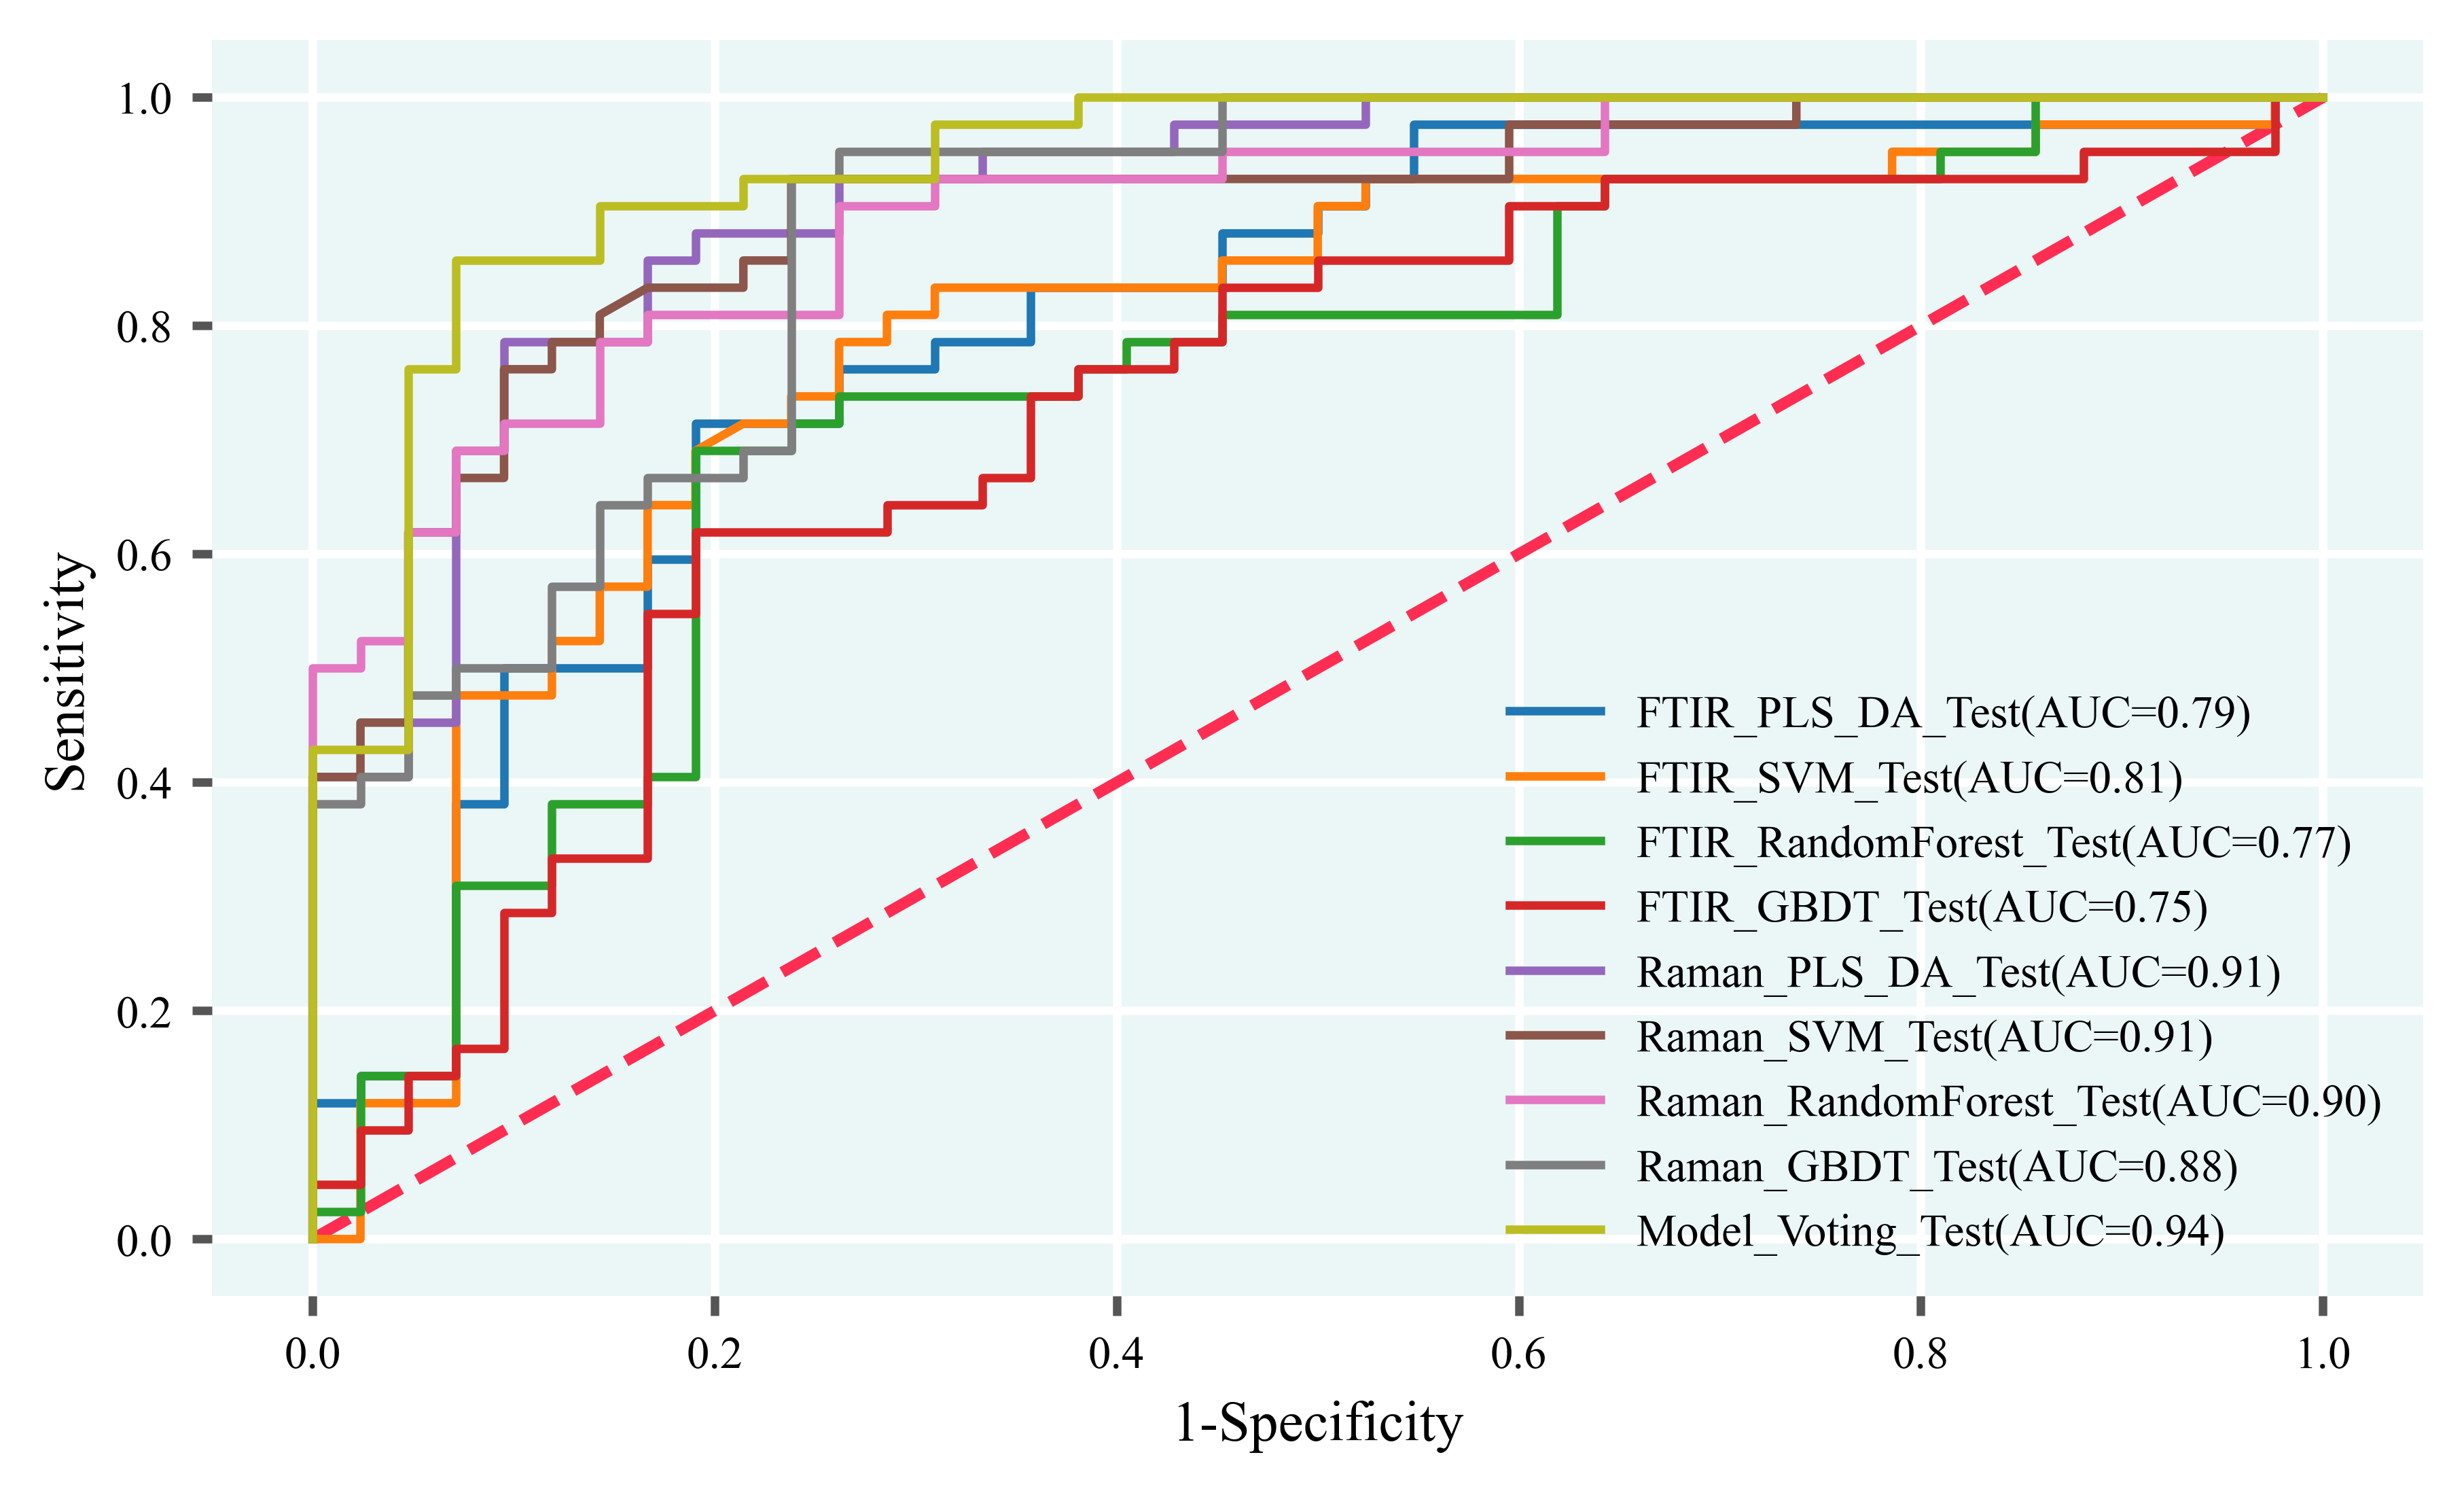

In [27]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
from pathlib import Path
from cycler import cycler
import matplotlib.font_manager as fm
# 全局修改rcParams["axes.prop_cycle"]，对所有子图生效
default_cycler = (cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) )
plt.style.use('ggplot')
plt.rc('axes', prop_cycle=default_cycler,labelcolor='#000000',facecolor='#ebf6f7',linewidth=0)
plt.rc('font',family='Times New Roman',weight='roman',size=8)
font_title=fm.FontProperties(family='Times New Roman',weight='roman',size=12)
font_label=fm.FontProperties(family='Times New Roman',weight='roman',size=10)


#plt.figure(figsize=(8,5),dpi=600)
#plt.subplots_adjust(hspace=0.2, wspace=0.1)

fig, axs = plt.subplots(figsize=(7, 4),dpi=600)
#plt.subplots_adjust(hspace=0.1, wspace=0.4)
aucs_FTIR=['0.79','0.81','0.77','0.75']
aucs_Raman= ['0.91','0.91','0.90','0.88']
plt.plot([0,1],[0,1],color='#ff2d51',lw=2,ls='--')
for estimator,auc in zip(estimators_FTIR,aucs_FTIR):
    RocCurveDisplay.from_estimator(estimator[1],x_FTIR_test,y_FTIR_test_two,ax=axs,label='FTIR_'+estimator[0]+'_Test(AUC=%s)'%(auc))
for estimator,auc in zip(estimators_Raman,aucs_Raman):
    RocCurveDisplay.from_estimator(estimator[1],x_Raman_test,y_Raman_test_two,ax=axs,label='Raman_'+estimator[0]+'_Test(AUC=%s)'%(auc))

RocCurveDisplay.from_predictions(y_FTIR_test_two,test_fea[:,1],ax=axs,label='Model_Voting_Test(AUC=0.94)')
axs.tick_params(axis='both',labelsize=8,labelcolor='#000000',direction='out',width=1.5,grid_linewidth=1.5)
axs.set_xlabel('1-Specificity',fontproperties=font_label)
axs.set_ylabel('Sensitivity',fontproperties=font_label)
axs.legend(loc='best',frameon=False)

#plt.savefig('图片/ROC_Model.eps',dpi=600,format='eps',bbox_inches='tight')
plt.show()

In [28]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
from pathlib import Path
from cycler import cycler
import matplotlib as mpl
import matplotlib.font_manager as fm
# 全局修改rcParams["axes.prop_cycle"]，对所有子图生效
default_cycler = (cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) )
plt.style.use('ggplot')
plt.rc('axes', prop_cycle=default_cycler,labelcolor='#000000',facecolor='#ebf6f7',linewidth=0)
plt.rc('font',family='Times New Roman',weight='roman',size=12)
plt.rc('text',color='#000000')
font_title=fm.FontProperties(family='Times New Roman',weight='roman',size=14)
font_label=fm.FontProperties(family='Times New Roman',weight='roman',size=10)


#plt.figure(figsize=(8,5),dpi=600)
#plt.subplots_adjust(hspace=0.2, wspace=0.1)


estimators_all=[('FTIR_PLS_DA',clc_1_FTIR),('FTIR_SVM',clc_2_FTIR),('FTIR_RandomForest',clc_3_FTIR),('FTIR_GBDT',clc_4_FTIR),
                ('Raman_PLS_DA',clc_1_Raman),('Raman_SVM',clc_2_Raman),('Raman_RandomForest',clc_3_Raman),('Raman_GBDT',clc_4_Raman),
               ('Model_Voting_Test',1)]
fig, axes = plt.subplots(3, 3, figsize=(18, 15), constrained_layout=True,dpi=600)
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
for estimator,axs,i in zip(estimators_all,axes.flat,[*range(9)]):
    if i<4:
        ConfusionMatrixDisplay.from_estimator(estimator[1],x_FTIR_test,y_FTIR_test_two,ax=axs,display_labels=['Postmortem','Antemortem'],cmap='Blues',colorbar=False)
        axs.tick_params(axis='both',labelsize=10,labelcolor='#000000',direction='out',width=1.5,grid_linewidth=0)
        m=fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=40),cmap='Blues'),ax=axs,ticks=[0,10,20,30,40])
        m.ax.tick_params(labelsize=8,labelcolor='#000000',direction='out',width=1.5)
        axs.set_title('%s'%(estimator[0])+'_Test',fontproperties=font_title)
    elif i<8:
        ConfusionMatrixDisplay.from_estimator(estimator[1],x_Raman_test,y_Raman_test_two,ax=axs,display_labels=['Postmortem','Antemortem'],cmap='Blues',colorbar=False)
        axs.tick_params(axis='both',labelsize=10,labelcolor='#000000',direction='out',width=1.5,grid_linewidth=0)
        m=fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=40),cmap='Blues'),ax=axs,ticks=[0,10,20,30,40])
        m.ax.tick_params(labelsize=8,labelcolor='#000000',direction='out',width=1.5)
        axs.set_title('%s'%(estimator[0])+'_Test',fontproperties=font_title)
    else :
        ConfusionMatrixDisplay.from_predictions(y_Raman_test_two,test_fea_pred,ax=axs,display_labels=['Postmortem','Antemortem'],cmap='Blues',colorbar=False)
        axs.tick_params(axis='both',labelsize=10,labelcolor='#000000',direction='out',width=1.5,grid_linewidth=0)
        m=fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=40),cmap='Blues'),ax=axs,ticks=[0,10,20,30,40])
        m.ax.tick_params(labelsize=8,labelcolor='#000000',direction='out',width=1.5)
        axs.set_title('%s'%(estimator[0]),fontproperties=font_title)


#plt.savefig('图片/ConfusionMatrix_Model.eps',dpi=600,format='eps',bbox_inches='tight')
plt.show()

# 加权软投票

In [29]:
def estimator_proba_weight(estimators,Xtrain,Ytrain,Xtest,Ytest,weights):
    proba_train=pd.DataFrame()
    proba_test=pd.DataFrame()
    for estimator, weight in zip(estimators,weights):
        estimator[1].fit(Xtrain,Ytrain)
        a1=(pd.DataFrame(estimator[1].predict_proba(Xtrain)))*weight
        a2=(pd.DataFrame(estimator[1].predict_proba(Xtest)))*weight
        proba_train=pd.concat([proba_train,a1],axis=1)
        proba_test=pd.concat([proba_test,a2],axis=1)
    
    return proba_train,proba_test

def soft_vote(proba):
    a1=np.zeros_like(proba.values[:,0])
    a2=np.zeros_like(proba.values[:,0])
    for i in range(0,8):
        a1+=proba.values[:,2*i]
        a2+=proba.values[:,2*i+1]
    
    comb=np.hstack([a1.reshape(-1,1),a2.reshape(-1,1)])
    temp=np.zeros_like(comb)
    for i in range(0,comb.shape[0]):
        for j in range(0,comb.shape[1]):
            temp[i,j]=comb[i,j]/np.sum(comb,axis=1).reshape(-1,1)[i]
    return temp

def soft_vote_cv_weight(x_train,split,seed):
    """
    x_train: 需要交叉验证的训练集
    split：几折交叉验证
    seed：随机数
    """
    train_1=[]
    test_1=[]
    y_train=[]
    y_test=[]
    cval = KFold(n_splits=split, shuffle=True, random_state=seed)
    for train, test in cval.split(x_train):
        FTIR_proba_train,FTIR_proba_test=estimator_proba_weight(estimators_FTIR,x_FTIR_train[train,:],y_FTIR_train_two[train],
                                                                x_FTIR_train[test,:],y_FTIR_train_two[test],[0.2917,0.5996,0.50,0.29]) #修改权重
        Raman_proba_train,Raman_proba_test=estimator_proba_weight(estimators_Raman,x_Raman_train[train,:],y_Raman_train_two[train],
                                                                  x_Raman_train[test,:],y_Raman_train_two[test],[0.5298,0.1706,0.4529,0.4507])#修改权重
        all_proba_train=pd.concat([FTIR_proba_train,Raman_proba_train],axis=1)
        all_proba_test=pd.concat([FTIR_proba_test,Raman_proba_test],axis=1)
        train_1.append(all_proba_train)
        test_1.append(all_proba_test)
        y_train.append(y_FTIR_train_two[train])
        y_test.append(y_FTIR_train_two[test])

    train_2=[]
    test_2=[]
    for i in range(10):
        train_2.append(soft_vote(train_1[i]))
        test_2.append(soft_vote(test_1[i]))

    train_3=[]
    test_3=[]
    for i in range(10):
        train_3.append(np.argmax(train_2[i],axis=1))
        test_3.append(np.argmax(test_2[i],axis=1))
    
    train_pro=[]
    test_pro=[]
    for i in range(10):
        train_pro.append(accuracy_score(y_train[i],train_3[i]))
        test_pro.append(accuracy_score(y_test[i],test_3[i]))
    
    return np.mean(train_pro) , np.mean(test_pro)

In [30]:
# TPE搜索 
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, partial
from hyperopt.early_stop import no_progress_loss


def hyperopt_objective(params):
    
    #定义评估器
    #需要搜索的参数需要从输入的字典中索引出来
    #不需要搜索的参数，可以是设置好的某个值
    #在需要整数的参数前调整参数类型
    train_1=[]
    test_1=[]
    y_train=[]
    y_test=[]
    cval = KFold(n_splits=10, shuffle=True, random_state=int(params['random_state']))
    for train, test in cval.split(x_FTIR_train):
        FTIR_proba_train,FTIR_proba_test=estimator_proba_weight(estimators_FTIR,x_FTIR_train[train,:],y_FTIR_train_two[train],x_FTIR_train[test,:],y_FTIR_train_two[test],[params['FTIR1'],params['FTIR2'],params['FTIR3'],params['FTIR4']])
        Raman_proba_train,Raman_proba_test=estimator_proba_weight(estimators_Raman,x_Raman_train[train,:],y_Raman_train_two[train],x_Raman_train[test,:],y_Raman_train_two[test],[params['Raman1'],params['Raman2'],params['Raman3'],params['Raman4']])
        all_proba_train=pd.concat([FTIR_proba_train,Raman_proba_train],axis=1)
        all_proba_test=pd.concat([FTIR_proba_test,Raman_proba_test],axis=1)
        train_1.append(all_proba_train)
        test_1.append(all_proba_test)
        y_train.append(y_FTIR_train_two[train])
        y_test.append(y_FTIR_train_two[test])

    train_2=[]
    test_2=[]
    for i in range(10):
        train_2.append(soft_vote(train_1[i]))
        test_2.append(soft_vote(test_1[i]))
    

    train_3=[]
    test_3=[]
    for i in range(10):
        train_3.append(np.argmax(train_2[i],axis=1))
        test_3.append(np.argmax(test_2[i],axis=1))
    
    train_pro=[]
    test_pro=[]
    for i in range(10):
        train_pro.append(accuracy_score(y_train[i],train_3[i]))
        test_pro.append(accuracy_score(y_test[i],test_3[i]))
    
    
    #最终输出结果，由于只能取最小值，所以必须对（-RMSE）求绝对值
    #以求解最小RMSE所对应的参数组合
    return -np.mean(test_pro)
 
    
# best params:  {'FTIR1': 0.6004730269526704, 'FTIR2': 0.9619032368112226, 'FTIR3': 0.65449412583954, 'FTIR4': 0.35829978944764573, 'Raman1': 0.5848723442717438,
#               'Raman2': 0.8323419340757566, 'Raman3': 0.693467496191149, 'Raman4': 0.6471223107232328, 'random_state': 492.0}
param_grid_tpe = {'random_state': hp.quniform("random_state",1,1000,1)
                 ,'FTIR1':hp.uniform('FTIR1',0,1)
                 ,'FTIR2':hp.uniform('FTIR2',0,1)
                 ,'FTIR3':hp.uniform('FTIR3',0,1)
                 ,'FTIR4':hp.uniform('FTIR4',0,1)
                 ,'Raman1':hp.uniform('Raman1',0,1)
                 ,'Raman2':hp.uniform('Raman2',0,1)
                 ,'Raman3':hp.uniform('Raman3',0,1)
                 ,'Raman4':hp.uniform('Raman4',0,1)
                 }


def param_hyperopt(max_evals=100,n=50):
    
    #保存迭代过程
    trials = Trials()
    
    #设置提前停止
    early_stop_fn = no_progress_loss(n)
    
    #定义代理模型
    #algo = partial(tpe.suggest, n_startup_jobs=20, n_EI_candidates=50)
    params_best = fmin(hyperopt_objective #目标函数
                       , space = param_grid_tpe #参数空间
                       , algo = tpe.suggest #代理模型你要哪个呢？
                       #, algo = algo
                       , max_evals = max_evals #允许的迭代次数
                       , verbose=True
                       , trials = trials
                       , early_stop_fn = early_stop_fn
                      )
    
    #打印最优参数，fmin会自动打印最佳分数
    print("\n","\n","best params: ", params_best,
          "\n")
    return params_best, trials

#  params_best, trials = param_hyperopt(500,100)

In [31]:
FTIR_proba_train,FTIR_proba_test=estimator_proba_weight(estimators_FTIR,x_FTIR_train,y_FTIR_train_two,x_FTIR_test,y_FTIR_test_two,[0.2917,0.5996,0.50,0.29])
Raman_proba_train,Raman_proba_test=estimator_proba_weight(estimators_Raman,x_Raman_train,y_Raman_train_two,x_Raman_test,y_Raman_test_two,[0.5298,0.1706,0.4529,0.4507])

all_proba_train=pd.concat([FTIR_proba_train,Raman_proba_train],axis=1)
all_proba_test=pd.concat([FTIR_proba_test,Raman_proba_test],axis=1)

train=soft_vote(all_proba_train)
test=soft_vote(all_proba_test)

train_pred=np.argmax(train,axis=1)
test_pred=np.argmax(test,axis=1)

print("train_acc:",accuracy_score(y_FTIR_train_two,train_pred)
      ,'\n''test_acc:',accuracy_score(y_FTIR_test_two,test_pred))

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


train_acc: 1.0 
test_acc: 0.8809523809523809


In [32]:
soft_vote_cv_weight(all_proba_train,10,857)

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` h

(1.0, 0.8722816399286988)